# Statistical Analysis of Extreme Precipitation Indices (EPI)

This notebook was designed to carry out the statistical analysis of the output data obtained from `Computing_Indices.ipynb`

### Main considerations

* Test

### Setting Python Modules

In [1]:
# Imports for xclim and xarray
import xclim as xc
import pandas as pd
import numpy as np
from numpy import exp
import xarray as xr
import scipy.stats as stats
from scipy.stats import rankdata
from scipy.stats import norm
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import boxcox
from math import ceil

# File handling libraries
import time
import tempfile
from pathlib import Path

# import plotting stuff
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
# Set some plotting defaults
plt.rcParams['figure.figsize'] = (15, 11)
plt.rcParams['figure.dpi'] = 100

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


### 1. Reading the Data

In [9]:
# Set directory to read and for outputs
fldr_src = Path('/mnt/c/Users/C0060017/Documents/Taught_Material/MRes_Dissertation/Dissertation/MRes_dataset/active_data/102_weather/')
# Check saved files
!ls {fldr_src}

# Reading the data
ERA_dataset = xr.open_dataset(Path(fldr_src / 'era5_copernicus_xclimSeason_QSDEC_prcp_2001-2019'))
IMERG_dataset = xr.open_dataset(Path(fldr_src / 'gpm_imerg_xclimSeason_QSDEC_prcp_2001-2019'))
HADUK_dataset = xr.open_dataset(Path(fldr_src / 'haduk_metoffice_xclimSeason_QSDEC_prcp_2001-2019'))


era5_copernicus_xclimSeason_QSDEC_prcp_2001-2019
era5_copernicus_xclim_prcp_2001-2019
gpm_imerg_xclimSeason_QSDEC_prcp_2001-2019
gpm_imerg_xclim_prcp_2001-2019
haduk_metoffice_xclimSeason_QSDEC_prcp_2001-2019
haduk_metoffice_xclim_prcp_2001-2019


### 2. Plotting the data

AttributeError: 'FacetGrid' object has no attribute 'set_xlim'

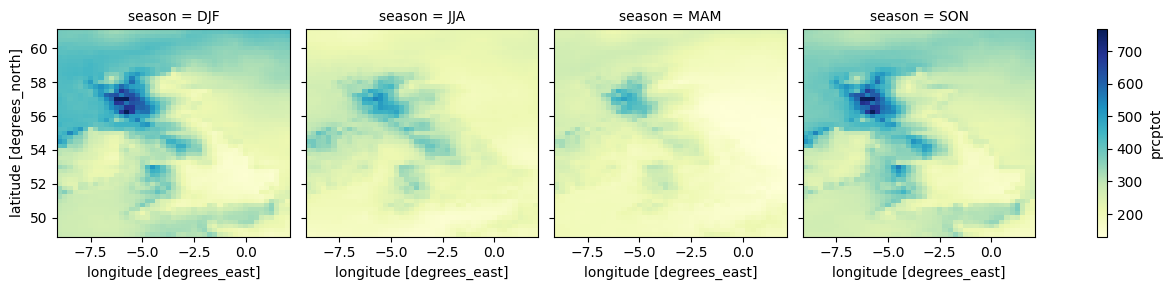

In [21]:
ERA_dataset_seasonal = ERA_dataset.groupby('time.season').mean(dim='time')
IMERG_dataset_seasonal = IMERG_dataset.groupby('time.season').mean(dim='time')
HADUK_dataset_seasonal = HADUK_dataset.groupby('time.season').mean(dim='time')



# # Plot the output
# ds_seasonal.prcptot.plot(col='season', col_wrap=4, x='longitude', y='latitude', cmap='YlGnBu')
# plt.show()

# create plots
ERA_dataset_seasonal.prcptot.plot(col='season', col_wrap=4, x='longitude', y='latitude', cmap='YlGnBu')
IMERG_dataset_seasonal.prcptot.plot(col='season', col_wrap=4, x='lon', y='lat', cmap='YlGnBu')
HADUK_dataset_seasonal.prcptot.plot(col='season', col_wrap=4, x='longitude', y='latitude', cmap='YlGnBu')

# Make sure it show a nice layout avoiding overlapping
plt.set_xlim([-9, 2])
plt.set_ylim([48, 61])
plt.tight_layout()
